# use of API's 

In [58]:
from pycoingecko import CoinGeckoAPI
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import plotly

In [29]:
cg=CoinGeckoAPI()
bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin',vs_currency='inr',days=30)
bitcoin_data.keys()

dict_keys(['prices', 'market_caps', 'total_volumes'])

In [30]:
data=pd.DataFrame(bitcoin_data['prices'],columns=['TimeStamp','Price'])
data

,TimeStamp,Price
0,1710777951877,5.582074e+06
1,1710781634488,5.546910e+06
2,1710785020118,5.589984e+06
3,1710788769252,5.559199e+06
4,1710792388682,5.560321e+06
...,...,...
716,1713355664566,5.250531e+06
717,1713358891044,5.214475e+06
718,1713362600532,5.237458e+06
719,1713366253232,5.123829e+06


In [32]:
data['date']=pd.to_datetime(data['TimeStamp'],unit='ms')
data['date']

0     2024-03-18 16:05:51.877
1     2024-03-18 17:07:14.488
2     2024-03-18 18:03:40.118
3     2024-03-18 19:06:09.252
4     2024-03-18 20:06:28.682
                ...          
716   2024-04-17 12:07:44.566
717   2024-04-17 13:01:31.044
718   2024-04-17 14:03:20.532
719   2024-04-17 15:04:13.232
720   2024-04-17 15:59:10.000
Name: date, Length: 721, dtype: datetime64[ns]

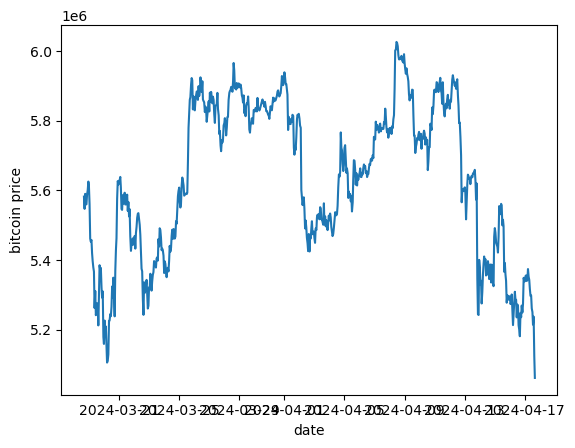

In [33]:
plt.plot(data['TimeStamp'],data['Price'])
plt.xlabel('date')
plt.ylabel('bitcoin price')
plt.show()

In [50]:
candlestick_data=data.groupby(data.date.dt.date).agg({'Price':['min','max','first','last']})

In [74]:
fig=go.Figure(data=[go.Candlestick(
    x=candlestick_data.index,
    open=candlestick_data['Price']['first'],
    high=candlestick_data['Price']['max'],
    low=candlestick_data['Price']['min'],
    close=candlestick_data['Price']['last']
                                )
                   ])
fig.update_layout(
    xaxis_rangeslider_visible=False,
    xaxis_title='Date',
    yaxis_title='Price (INR)',
    title='Bitcoin Candlestick chart over past 30 Days',
    
)
plotly.offline.plot(fig,filename='./bitcoin_candlestick_graph.html',auto_open=False)

'./bitcoin_candlestick_graph.html'

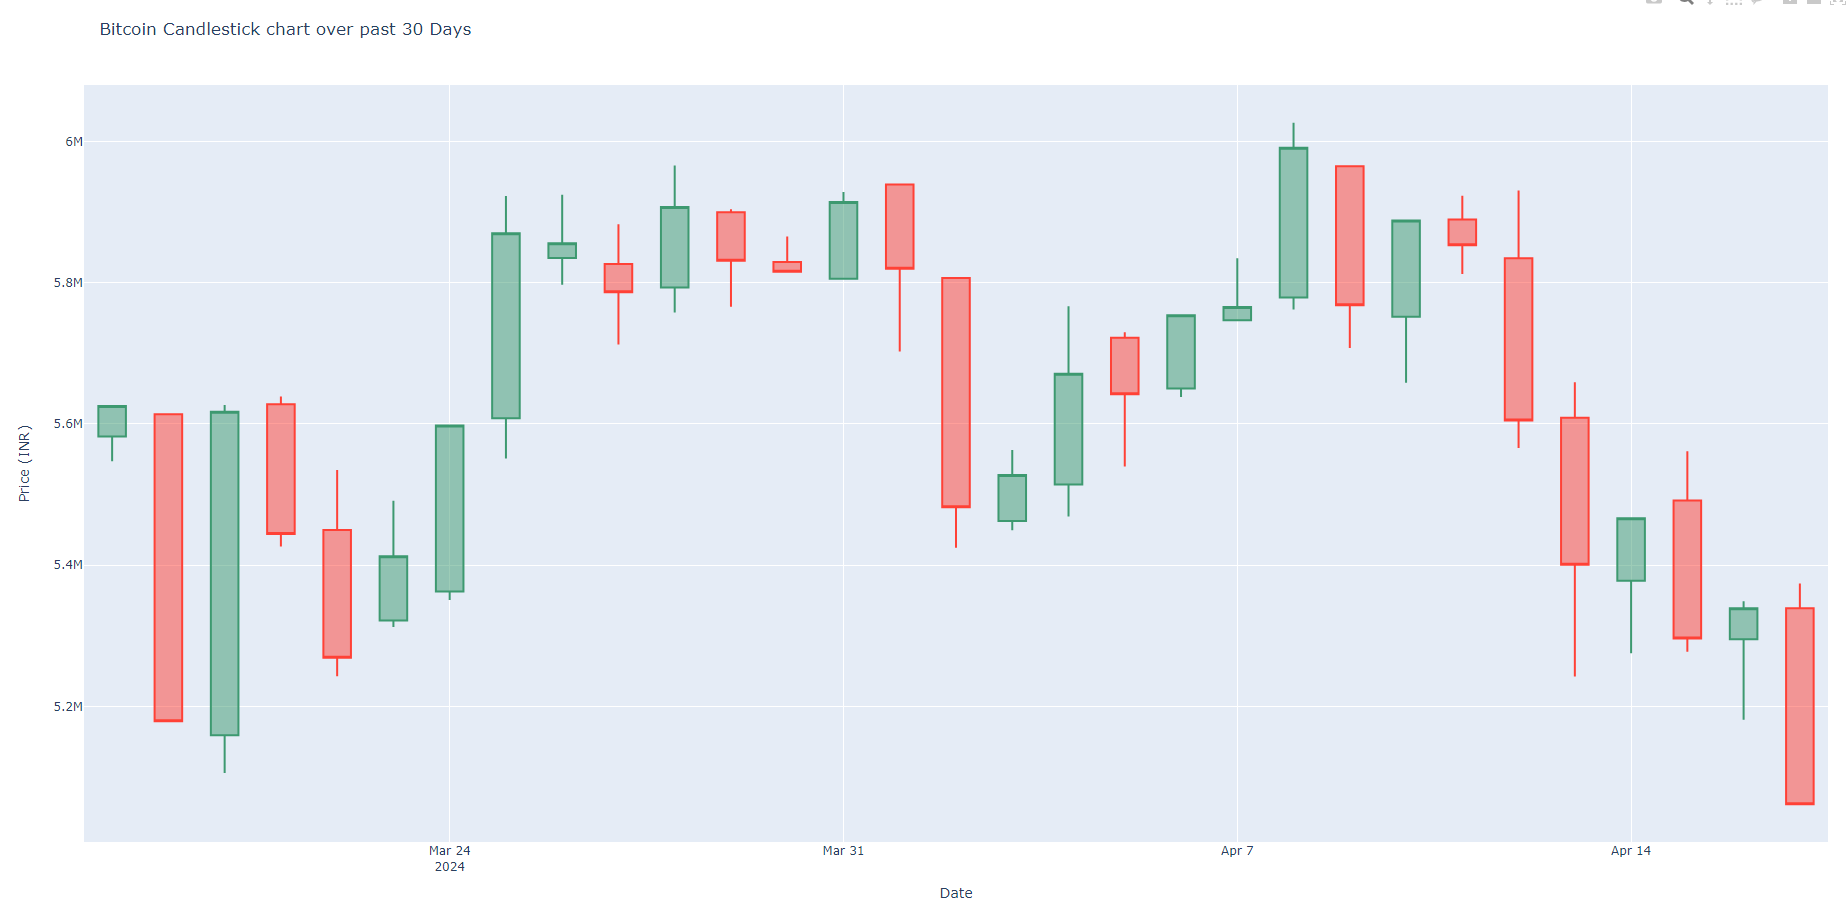